In [5]:
# global definitions

import os

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sn

import numpy as np

import pandas as pd

from scipy.special import expit

from common_defs import *

main_dir = 'exp1/'
data_dir = "exp1/generated_data_cluster"
param_dir = 'exp1/parameters/'

#data_dir = 'exp2/generated_data_realistic/'
#param_dir = 'exp2/parameters/'

ideo2att_error = 0.0  

# ideological space
phi_filename = os.path.join(data_dir, 'phi.txt')
phi_info_filename = os.path.join(data_dir, 'phi_info.txt')
phi_group_filename = os.path.join(data_dir, 'phi_group.txt')
phi_group_info_filename = os.path.join(data_dir, 'phi_group_info.txt')
#
theta_filename = os.path.join(data_dir, 'theta.txt')

# attitudinal space
r_filename = os.path.join(data_dir, 'r.txt')
f_filename = os.path.join(data_dir, 'f.txt')
Tideo2att_tilde_filename = os.path.join(param_dir, 'Tideo2att_tilde.txt')

# social space
r_P_filename = os.path.join(data_dir, 'r_P.txt')
f_P_filename = os.path.join(data_dir, 'f_P.txt')
A_P_filename = os.path.join(param_dir, 'A_P.txt')

# social graph
edge_filename = os.path.join(data_dir, 'all_edges.csv')
alpha = 2
beta = 2
social_graph_filename = os.path.join(data_dir, 'social_graph.csv')

# predicted ideological space
phi_latent_filename = os.path.join(data_dir, 'target_ideological_dimensions.csv')
theta_latent_filename = os.path.join(data_dir, 'source_ideological_dimensions.csv')
# inertia
explained_inertia_filename = os.path.join(data_dir, 'explained_inertia.txt')

# predicted attitudinal space
phi_hat_filename = os.path.join(data_dir, 'phi_hat.csv')
theta_hat_filename = os.path.join(data_dir, 'theta_hat.csv')

# errors
phi_hat_error_filename = os.path.join(data_dir, 'phi_hat_error.txt')
theta_hat_error_filename = os.path.join(data_dir, 'theta_hat_error.txt')

In [6]:
# load ideological space data
phi = np.loadtxt(phi_filename, delimiter = ",")
phi = phi.T

phi_info = np.loadtxt(phi_info_filename, delimiter = ",", dtype = str)
phi_info = phi_info.T[:2]
phi_info = phi_info.astype(int)

phi_group_df = pd.read_csv(phi_group_filename)
phi_group_df.drop(['group_id'], inplace = True, axis = 1)
phi_group = phi_group_df.to_numpy()
phi_group = phi_group.T
#print(phi_group)

phi_group_info = np.loadtxt(phi_group_info_filename, delimiter = ",", dtype = str)
#phi_group_info = phi_group_info.to_numpy()

# load followers data
theta = np.loadtxt(theta_filename, delimiter = ",")
theta = theta.T

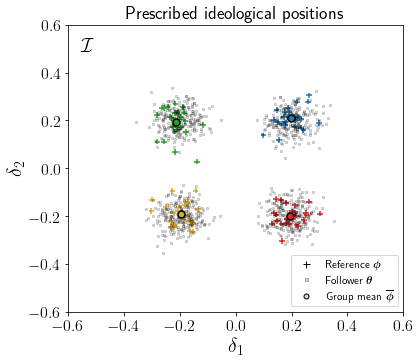

In [7]:
# plotting prescribed ideological positions

fig = plt.figure(figsize = bidimensional_figsize)
ax = fig.add_subplot(1, 1, 1)

phi_label_colors = [ref_label_colors[int(l)] for l in phi_info[1]]
ax.scatter(phi[0, :], phi[1, :], c = phi_label_colors, marker ='+', s = bds_ref, linewidths = bdlw_ref)

ax.scatter(theta[0,:], theta[1,:], color = 'k', marker = 's', s = bds_fol, alpha=0.15)

for i, l in enumerate(phi_group_info):
    ax.plot(phi_group[0, i], phi_group[1, i], color = ref_label_colors[i],
            marker = 'o', markersize = 7, markeredgewidth = 1.5, mec = 'black')
ax.set_xlabel(r'$\delta_1$', fontsize = bidimensional_label_fs)
ax.set_ylabel(r'$\delta_2$', fontsize = bidimensional_label_fs)
ax.set_title('Prescribed ideological positions', fontsize=bidimensional_title_fs)
ax.set_xlim((-0.6, 0.6))
ax.set_ylim((-0.6, 0.6))
ax.tick_params(axis = 'both', which = 'major', labelsize = bidimensional_tick_fs)
ax.legend(handles = ideo_legend, loc = 'lower right', fontsize = bidimensional_legend_fs)
ax.text(0.05, 0.925,r'$\mathcal{I}$', horizontalalignment = 'center',
        verticalalignment = 'center', transform = ax.transAxes, fontsize = bidimensional_space_fs)
plt.tight_layout()

plt.savefig(os.path.join(main_dir, 'prescribed_ideological.pdf'))

plt.show()

In [8]:
# load attitudinal space data

r = np.loadtxt(r_filename, delimiter = ",")
r = r.T

f = np.loadtxt(f_filename, delimiter = ",")
f = f.T

Tideo2att_tilde = np.loadtxt(Tideo2att_tilde_filename, delimiter = ",")

In [9]:
# compute the positions of the "corners" of the ideological spaces
ideo_corners = np.array([[0.6, 0.6], [-0.6, 0.6], [-0.6, -0.6], [0.6, -0.6]]).T
#
ideo_corners_att = unpad(Tideo2att_tilde.dot(pad(ideo_corners)))
#
ideo_corners_att_plot = np.hstack([ideo_corners_att, ideo_corners_att[:, 0][:, np.newaxis]])

ideo_dim_in_att = unpad(Tideo2att_tilde.dot(pad(np.hstack([np.eye(2), np.array([[0],[0]])]))))

/home/foula/linate_ca/correspondence_analysis/linate_module/test_data/common_defs.py:83: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
/home/foula/linate_ca/correspondence_analysis/linate_module/test_data/common_defs.py:83: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


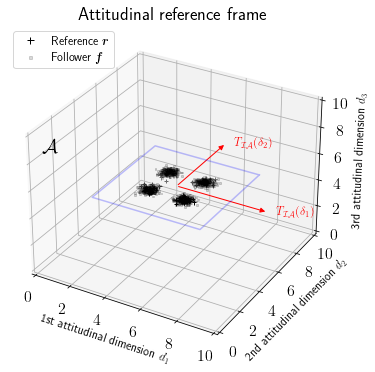

In [11]:
# plotting positions in attitudinal space A

fig = plt.figure(figsize = threedimensional_figsize)
ax = fig.add_subplot(projection = '3d')

# users
ax.scatter(r[0,:], r[1,:], r[2,:], marker = '+', color = 'black', s = tds_ref, linewidths = tdlw_ref, zorder = -1)
ax.scatter(f[0,:], f[1,:], f[2,:], marker = 's', color = 'black', s = tds_fol, alpha = 0.15, zorder = -1)

# ideo-plane i att space
ax.plot(ideo_corners_att_plot[0,:], ideo_corners_att_plot[1,:], ideo_corners_att_plot[2,:], color = 'blue', alpha = 0.25)
# ideological dimensions in att space
for delta in [0, 1]:
    ax.add_artist(Arrow3D([ideo_dim_in_att[0,2], ideo_dim_in_att[0,delta]],
                          [ideo_dim_in_att[1,2], ideo_dim_in_att[1,delta]],
                          [ideo_dim_in_att[2,2], ideo_dim_in_att[2,delta]],
                          mutation_scale = 10, lw = 1, arrowstyle = "-|>", color = "r") )
    ax.text(ideo_dim_in_att[0, delta] + 0.5,
            ideo_dim_in_att[1, delta],
            ideo_dim_in_att[2, delta],
            r'$T_{\mathcal{I}\mathcal{A}}(\delta_{%d})$'%(delta+1),color='red')

# setting axes
ax.set_xlim((0,10))
ax.set_ylim((0,10))
ax.set_zlim((0,10))
ax.set_xlabel('1st attitudinal dimension ' + r'$d_1$', fontsize = threedimensional_label_fs)
ax.set_ylabel('2nd attitudinal dimension ' + r'$d_2$', fontsize = threedimensional_label_fs)
ax.set_zlabel('3rd attitudinal dimension ' + r'$d_3$', fontsize = threedimensional_label_fs)
ax.set_title('Attitudinal reference frame',fontsize = threedimensional_title_fs)
ax.tick_params(axis='both', which='major', labelsize = threedimensional_tick_fs)
ax.legend(handles=att_legend,loc='upper left',fontsize = threedimensional_legend_fs)
ax.text(1, 0.0, 9.5, r'$\mathcal{A}$', horizontalalignment='center', 
                    verticalalignment='center', fontsize = tridimensional_space_fs)
plt.tight_layout()

plt.savefig(os.path.join(main_dir, 'attirudinal_reference_frame.pdf'))

plt.show()

In [12]:
# load social space data

r_P = np.loadtxt(r_P_filename, delimiter = ",")
r_P = r_P.T

f_P = np.loadtxt(f_P_filename, delimiter = ",")
f_P = f_P.T

A_P = np.loadtxt(A_P_filename, delimiter = ",")

In [13]:
# compute the positions of the "corners" of the ideological spaces

ideo_corners = np.array([[0.6, 0.6], [-0.6, 0.6], [-0.6, -0.6], [0.6, -0.6]]).T
#
ideo_corners_att = unpad(Tideo2att_tilde.dot(pad(ideo_corners)))
#
ideo_corners_att_plot = np.hstack([ideo_corners_att, ideo_corners_att[:, 0][:, np.newaxis]])

ideo_corners_att_plot_P = A_P.dot(ideo_corners_att_plot)

ideo_dim_in_att_P = A_P.dot(ideo_dim_in_att)

/home/foula/linate_ca/correspondence_analysis/linate_module/test_data/common_defs.py:83: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


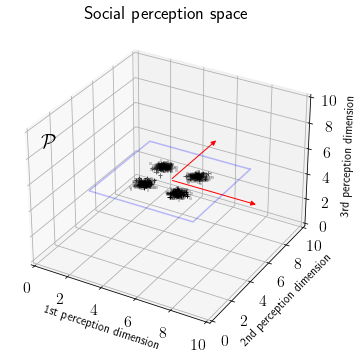

In [15]:
# Plotting positions in perception space P

fig = plt.figure(figsize = threedimensional_figsize)

ax = fig.add_subplot(projection='3d')

# users
ax.scatter(r_P[0,:], r_P[1,:], r_P[2,:], marker = '+', color = 'black', s = tds_ref, linewidths = tdlw_ref)
ax.scatter(f_P[0,:], f_P[1,:], f_P[2,:], marker = 's', color = 'black', s = tds_fol, alpha = 0.15)

# ideo-plane i att space
ax.plot(ideo_corners_att_plot_P[0, :], ideo_corners_att_plot_P[1,:], 
        ideo_corners_att_plot_P[2,:], color = 'blue', alpha = 0.25)

# ideological dimensions in att space
for delta in [0,1]:
    ax.add_artist(Arrow3D([ideo_dim_in_att_P[0,2], ideo_dim_in_att_P[0,delta]],
                          [ideo_dim_in_att_P[1,2], ideo_dim_in_att_P[1,delta]],
                          [ideo_dim_in_att_P[2,2], ideo_dim_in_att_P[2,delta]],
                          mutation_scale=10,lw=1, arrowstyle="-|>", color="r") )
# setting axes
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
ax.set_zlim((0, 10))
ax.set_xlabel('1st perception dimension ', fontsize = threedimensional_label_fs)
ax.set_ylabel('2nd perception dimension ', fontsize = threedimensional_label_fs)
ax.set_zlabel('3rd perception dimension ', fontsize = threedimensional_label_fs)
ax.set_title('Social perception space', fontsize = threedimensional_title_fs)
ax.tick_params(axis = 'both', which = 'major', labelsize = threedimensional_tick_fs)
# ax.legend(handles=att_legend,loc='lower right',fontsize=threedimensional_legend_fs)
ax.text(1, 0.0, 9.5, r'$\mathcal{P}$', horizontalalignment = 'center',
        verticalalignment = 'center', fontsize = tridimensional_space_fs)

plt.savefig(os.path.join(main_dir, 'social_perception_space.pdf'))

plt.tight_layout()
plt.show()

In [16]:
# load all pairwise distances

edge_df = pd.read_csv(edge_filename)

edge_df.head()

,source,target,source_indx,target_indx,distance,probability
0,f_0,r_0,0,0,0.511875,0.726363
1,f_0,r_1,0,1,0.036464,0.872925
2,f_0,r_2,0,2,0.188227,0.835284
3,f_0,r_3,0,3,0.178573,0.837923
4,f_0,r_4,0,4,0.131217,0.850378


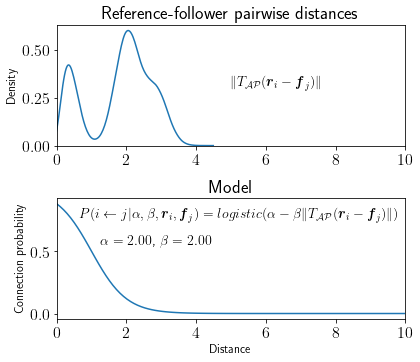

In [18]:
# plotting pair-wise distances and probability functions

x = np.linspace(0,10,100)

fig = plt.figure(figsize=bidimensional_figsize)
ax1 = fig.add_subplot(2,1,1)

sn.kdeplot(data = edge_df, x = 'distance', ax = ax1)

ax1.set_xlabel('')
ax1.set_ylabel('Density')
ax1.set_xlim((0,10))
ax1.text(5,np.mean(ax1.get_ylim()), r'$\|T_{\mathcal{A}\mathcal{P}}(\boldsymbol{r}_i-\boldsymbol{f}_j)\|$', fontsize = 14)
ax1.set_title('Reference-follower pairwise distances', fontsize = threedimensional_title_fs)
ax1.tick_params(axis = 'both', which='major', labelsize = bidimensional_tick_fs)

prob = lambda d: expit(alpha - beta * d)

ax2 = fig.add_subplot(2,1,2)
ax2.plot(x,prob(x))
ax2.set_xlim((0,10))
ax2.set_ylabel('Connection probability')
ax2.set_xlabel('Distance')
ax2.set_title('Model',fontsize=threedimensional_title_fs)
ax2.text(0.65,1.75*np.mean(ax2.get_ylim()), r'$P(i\leftarrow j | \alpha,\beta,\boldsymbol{r}_i,\boldsymbol{f}_j)=logistic(\alpha-\beta\|T_{\mathcal{A}\mathcal{P}}(\boldsymbol{r}_i-\boldsymbol{f}_j)\|)$',fontsize=14)
ax2.text(1.25,1.25*np.mean(ax2.get_ylim()), r'$\alpha=%.2f$'%alpha + ', '+r'$\beta=%.2f$'%beta, fontsize = 14)
ax2.tick_params(axis = 'both', which = 'major', labelsize = bidimensional_tick_fs)

plt.savefig(os.path.join(main_dir, 'pairwise_distances_and_model.pdf'))

plt.tight_layout()
plt.show()

In [19]:
# load social graph
social_graph_df = pd.read_csv(social_graph_filename)

for dim in [1,2]:
    social_graph_df['references_delta_%d'%dim] = social_graph_df['target_indx'].apply(lambda i: phi[dim - 1, i])
    social_graph_df['followers_delta_%d'%dim] = social_graph_df['source_indx'].apply(lambda i: theta[dim - 1, i])

social_graph_df.head()

,source,target,source_indx,target_indx,distance,probability,references_delta_1,followers_delta_1,references_delta_2,followers_delta_2
0,f_0,r_0,0,0,0.511875,0.726363,0.146436,0.220083,0.244257,0.173146
1,f_0,r_1,0,1,0.036464,0.872925,0.212822,0.220083,0.173827,0.173146
2,f_0,r_2,0,2,0.188227,0.835284,0.227838,0.220083,0.209984,0.173146
3,f_0,r_3,0,3,0.178573,0.837923,0.234865,0.220083,0.205658,0.173146
4,f_0,r_4,0,4,0.131217,0.850378,0.241694,0.220083,0.158257,0.173146


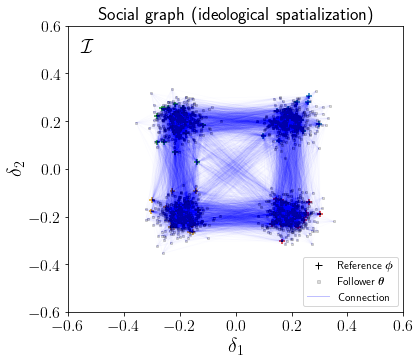

In [20]:
# plotting the social graph G with ideological spatialization

fig = plt.figure(figsize = bidimensional_figsize)
ax = fig.add_subplot(1, 1, 1)

for idx,row in social_graph_df.iterrows():
    ax.plot([row['references_delta_1'],row['followers_delta_1']],[row['references_delta_2'],row['followers_delta_2']],color='b',alpha=0.01,linewidth=1)

ax.scatter(phi[0,:],phi[1,:],c=phi_label_colors,marker='+',s=bds_ref,linewidths=bdlw_ref,alpha=1)
ax.scatter(theta[0,:],theta[1,:],color='k',marker='s',s=bds_fol,alpha=0.15)
ax.set_xlabel(r'$\delta_1$',fontsize=bidimensional_label_fs)
ax.set_ylabel(r'$\delta_2$',fontsize=bidimensional_label_fs)
ax.set_xlim((-0.6,0.6))
ax.set_ylim((-0.6,0.6))
ax.set_title('Social graph (ideological spatialization)',fontsize=bidimensional_title_fs)
ax.tick_params(axis='both', which='major', labelsize=bidimensional_tick_fs)
ax.legend(handles=graph_legend,loc='lower right',fontsize=bidimensional_legend_fs)
ax.text(0.05, 0.925, r'$\mathcal{I}$', horizontalalignment = 'center',
        verticalalignment='center', transform = ax.transAxes, fontsize = bidimensional_space_fs)

plt.tight_layout()

plt.savefig(os.path.join(main_dir, 'social_graph.pdf'))

plt.show()

In [21]:
# predicted ideological space data

phi_latent_df = pd.read_csv(phi_latent_filename)
phi_latent_df['sort'] = phi_latent_df['target_id'].apply(lambda d: int(d[d.index('_') + 1:]))
phi_latent_df = phi_latent_df.sort_values(by = ['sort'], ascending = True)

phi_latent_df.drop(['target_id'], axis = 1, inplace = True)
phi_latent_df.drop(['sort'], axis = 1, inplace = True)

phi_latent_np = phi_latent_df.to_numpy()
print(phi_latent_np.shape)

# also compute latent mean of each ideological group
groups = phi_info[1].astype(int)
group_ids = np.unique(groups)
mean_phi_latent_np = np.empty([len(group_ids), phi_latent_np.shape[1]])

gr_indx = 0
for g in group_ids:
    g_indx = np.where(groups == g)
    group = phi_latent_np[g_indx]
    mean_phi_latent_np[gr_indx] = np.mean(group, axis = 0)
    gr_indx = gr_indx + 1

phi_latent_np = phi_latent_np.T
mean_phi_latent_np = mean_phi_latent_np.T

#print(phi_latent_np.shape)
#print(phi_latent_np)

theta_latent_df = pd.read_csv(theta_latent_filename)
theta_latent_df['sort'] = theta_latent_df['source_id'].apply(lambda d: int(d[d.index('_') + 1:]))
theta_latent_df = theta_latent_df.sort_values(by = ['sort'], ascending = True)

theta_latent_df.drop(['source_id'], axis = 1, inplace = True)
theta_latent_df.drop(['sort'], axis = 1, inplace = True)

theta_latent_np = theta_latent_df.to_numpy()
#print(theta_latent_np.shape)
#print(theta_latent_np)

theta_latent_np = theta_latent_np.T

theta_latent_span = theta_latent_np.max(axis = 1) - theta_latent_np.min(axis = 1)

(100, 10)


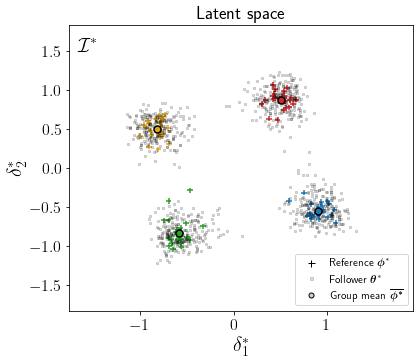

In [22]:
# plotting positions in predicted ideological latent space

fig = plt.figure(figsize = bidimensional_figsize)
ax = fig.add_subplot(1,1,1)

ax.scatter(phi_latent_np[0, :], phi_latent_np[1, :], c = phi_label_colors, marker='+', s = bds_ref, linewidths = bdlw_ref)
ax.scatter(theta_latent_np[0,:],theta_latent_np[1,:], color = 'k', marker = 's', s = bds_fol, alpha = 0.15)

for i, l in enumerate(phi_group_info):
    ax.plot(mean_phi_latent_np[0, i], mean_phi_latent_np[1, i], color = ref_label_colors[i], marker = 'o',
            markersize = 7, markeredgewidth = 1.5, mec = 'black')

ax.set_xlim((np.min(theta_latent_np[0, :]) -0.25 * theta_latent_span[0], 
             np.max(theta_latent_np[0,:]) + 0.25 * theta_latent_span[0]))
ax.set_ylim((np.min(theta_latent_np[1, :]) -0.25 * theta_latent_span[1], 
             np.max(theta_latent_np[1,:]) + 0.25 * theta_latent_span[1]))

ax.set_xlabel(r'$\delta^*_1$', fontsize = bidimensional_label_fs)
ax.set_ylabel(r'$\delta^*_2$', fontsize = bidimensional_label_fs)
ax.set_title('Latent space', fontsize = bidimensional_title_fs)
ax.tick_params(axis = 'both', which = 'major', labelsize = bidimensional_tick_fs)
ax.legend(handles = latent_legend, loc = 'lower right', fontsize = bidimensional_legend_fs)
ax.text(0.05, 0.925,r'$\mathcal{I}^*$', horizontalalignment = 'center', verticalalignment = 'center',
        transform = ax.transAxes,fontsize = bidimensional_space_fs)
plt.tight_layout()

plt.savefig(os.path.join(main_dir, 'latent_space.pdf'))

plt.show()

In [23]:
# load the estimated ideological position of users

phi_hat_df = pd.read_csv(phi_hat_filename)
phi_hat_df.head()

phi_hat_df['sort'] = phi_hat_df['entity'].apply(lambda d: int(d[d.index('_') + 1:]))
phi_hat_df = phi_hat_df.sort_values(by = ['sort'], ascending = True)

phi_hat_df.drop(['entity'], axis = 1, inplace = True)
phi_hat_df.drop(['sort'], axis = 1, inplace = True)

phi_hat_np = phi_hat_df.to_numpy()
#print(phi_hat_np.shape)

# also compute latent mean of each ideological group
groups = phi_info[1].astype(int)
group_ids = np.unique(groups)
mean_phi_hat_np = np.empty([len(group_ids), phi_hat_np.shape[1]])
gr_indx = 0
for g in group_ids:
    g_indx = np.where(groups == g)
    group = phi_hat_np[g_indx]
    mean_phi_hat_np[gr_indx] = np.mean(group, axis = 0)
    gr_indx = gr_indx + 1

phi_hat_np = phi_hat_np.T
mean_phi_hat_np = mean_phi_hat_np.T

print(phi_hat_np.shape)
print(mean_phi_hat_np.shape)

theta_hat_df = pd.read_csv(theta_hat_filename)
theta_hat_df['sort'] = theta_hat_df['entity'].apply(lambda d: int(d[d.index('_') + 1:]))
theta_hat_df = theta_hat_df.sort_values(by = ['sort'], ascending = True)

theta_hat_df.drop(['entity'], axis = 1, inplace = True)
theta_hat_df.drop(['sort'], axis = 1, inplace = True)

theta_hat_np = theta_hat_df.to_numpy()
theta_hat_np = theta_hat_np.T
print(theta_hat_np.shape)
#print(theta_hat_np)

#theta_latent_span = theta_latent_np.max(axis = 1) - theta_latent_np.min(axis = 1)

(2, 100)
(2, 4)
(2, 1000)


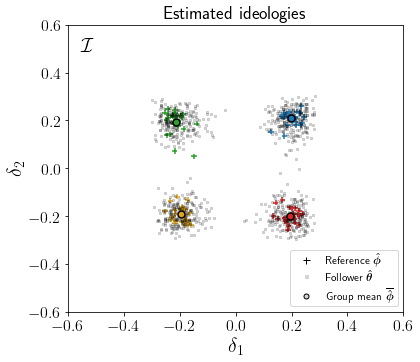

In [24]:
# plotting the estimated ideological position of users 

fig = plt.figure(figsize=bidimensional_figsize)
ax = fig.add_subplot(1,1,1)
ax.scatter(phi_hat_np[0, :], phi_hat_np[1, :], c = phi_label_colors, marker = '+', s = bds_ref, linewidths = bdlw_ref)
ax.scatter(theta_hat_np[0, :], theta_hat_np[1, :], color = 'k', marker = 's', s = bds_fol, alpha = 0.15)

for i, l in enumerate(phi_group_info):
    ax.plot(mean_phi_hat_np[0, i], mean_phi_hat_np[1, i],color = ref_label_colors[i],
            marker = 'o', markersize = 7, markeredgewidth = 1.5, mec = 'black')
ax.set_xlabel(r'$\delta_1$',fontsize = bidimensional_label_fs)
ax.set_ylabel(r'$\delta_2$',fontsize = bidimensional_label_fs)
ax.set_title('Estimated ideologies',fontsize=bidimensional_title_fs)
ax.set_xlim((-0.6,0.6))
ax.set_ylim((-0.6,0.6))
ax.tick_params(axis='both', which='major', labelsize=bidimensional_tick_fs)
ax.legend(handles=est_ideo_legend,loc='lower right',fontsize=bidimensional_legend_fs)
ax.text(0.05, 0.925, r'$\mathcal{I}$', horizontalalignment = 'center',
        verticalalignment = 'center', transform = ax.transAxes, fontsize = bidimensional_space_fs)

plt.savefig(os.path.join(main_dir, 'estimated_ideologies.pdf'))

plt.tight_layout()
plt.show()

In [25]:
# load dimension erros
phi_error = np.loadtxt(phi_hat_error_filename, delimiter = ",")

theta_error = np.loadtxt(theta_hat_error_filename, delimiter = ",")

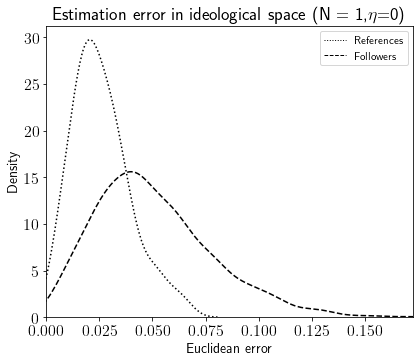

In [26]:
# Plotting the distribution of errors

fig = plt.figure(figsize = bidimensional_figsize)
ax = fig.add_subplot(1, 1, 1)

# referential users
sn.kdeplot(phi_error, ax = ax, linestyle = ":", color = 'k')
sn.kdeplot(theta_error,ax=ax,linestyle = "--", color = 'k')

ax.set_xlabel('Euclidean error', fontsize = 14)
ax.set_ylabel('Density', fontsize = 14)

ax.set_xlim((0, np.max([phi_error.max(), theta_error.max()])))

ax.legend(handles = error_legend, loc = 'upper right', fontsize = bidimensional_legend_fs)
ax.set_title('Estimation error in ideological space (N = 1,'+r'$\eta$='+ '%.0f)'%ideo2att_error,
             fontsize = bidimensional_title_fs)
ax.tick_params(axis = 'both', which = 'major', labelsize = bidimensional_tick_fs)

plt.tight_layout()

plt.savefig(os.path.join(main_dir, 'error_distribution.pdf'))

plt.show()

In [27]:
# load explained inertia

explained_inertia = np.loadtxt(explained_inertia_filename, delimiter = ",")

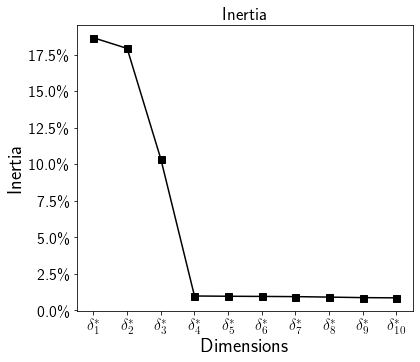

In [29]:
# Plotting the dimensionality structure of the latent space: CA inertia
fig = plt.figure(figsize = bidimensional_figsize)
ax = fig.add_subplot(1,1,1)

ax.plot(range(len(explained_inertia)), 100.0 * np.array(explained_inertia),
        color = 'k', marker = 's', linestyle = '-', markersize = 7)
ax.set_xticks(range(len(explained_inertia)))
ax.set_xticklabels([r'${\delta}^*_{%d}$'%(dim+1) for dim in range(len(explained_inertia))])
ax.set_xlabel('Dimensions', fontsize = bidimensional_label_fs)
ax.set_ylabel('Inertia', fontsize = bidimensional_label_fs)
ax.set_xlim((-0.5,len(explained_inertia)-0.5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title('Inertia', fontsize = bidimensional_title_fs)
ax.tick_params(axis = 'both', which = 'major', labelsize = bidimensional_tick_fs)

plt.tight_layout()

plt.savefig(os.path.join(main_dir, 'explained_inertia.pdf'))

plt.show()